In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
import pandas as pd
import numpy as np
 
 
def plot_decision_regions(x, y, classifier, resolution=0.02):
    markers = ['s', 'x', 'o', '^', 'v']
    colors = ['r', 'g', 'b', 'gray', 'cyan']
    cmap = ListedColormap(colors[:len(np.unique(y))])
 
    x1_min, x1_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    x2_min, x2_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, z, alpha=0.4, cmap=cmap)
 
    for idx, cc in enumerate(np.unique(y)):
        plt.scatter(x=x[y == cc, 0],
                    y=x[y == cc, 1],
                    alpha=0.6,
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx],
                    label=cc)


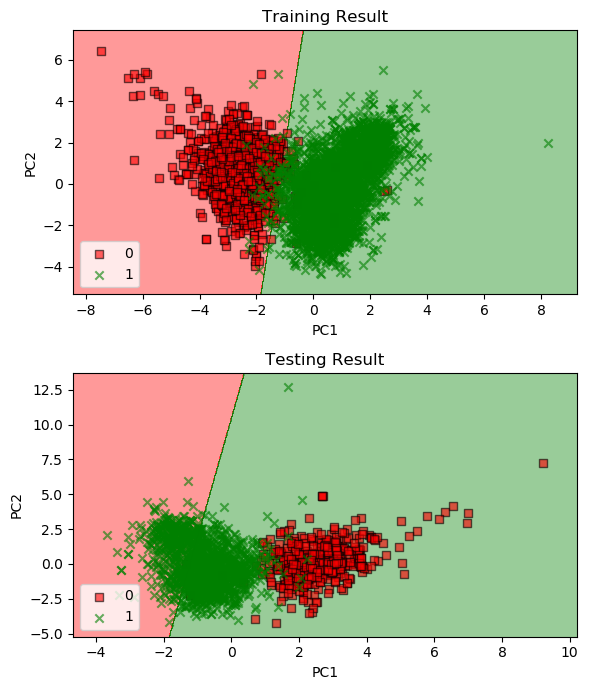

In [19]:
 
 
def main():
   
    df_wine = pd.read_csv('D:\my_dateset\wine.csv')  
    le = LabelEncoder()
    df_wine['type'] = le.fit_transform(df_wine['type'])
    le.classes_
    le.transform(le.classes_)
    dict(zip(le.classes_, le.transform(le.classes_)))

 
    # split the data，train：test=7:3
    x, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=0)
 
    # standardize the feature 标准化单位方差
    sc = StandardScaler()
    x_train_std = sc.fit_transform(x_train)
    x_test_std = sc.fit_transform(x_test)

 
    pca = PCA(n_components=2)
    svm = SVC(kernel='linear', C=1.0, random_state=0)
    x_train_pca = pca.fit_transform(x_train_std)
    x_test_pca = pca.fit_transform(x_test_std)   # 预测时候特征向量正负问题，乘-1反转镜像
    svm.fit(x_train_pca, y_train)
    plt.figure(figsize=(6, 7), dpi=100)  # 画图高宽，像素
    plt.subplot(2, 1, 1)
    plot_decision_regions(x_train_pca, y_train, classifier=svm)
    plt.title('Training Result')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend(loc='lower left')
 
    plt.subplot(2, 1, 2)
    plot_decision_regions(x_test_pca, y_test, classifier=svm)
    plt.title('Testing Result')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend(loc='lower left')
    plt.tight_layout()  # 子图间距
    plt.show()
 
 
if __name__ == '__main__':
    main()